In [1]:
pip install python-mnist

You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np
import random
from collections import Counter
from sklearn.metrics import accuracy_score

In [ ]:
# Assuming the training and testing data is present in /MNIST folder
mndata=MNIST('/Users/amanbhala/Downloads/data')
train_images,train_labels=mndata.load_training()
train_images,train_labels=np.array(train_images),np.array(train_labels)

In [6]:
test_images,test_labels=mndata.load_testing()
test_images,test_labels=np.array(test_images),np.array(test_labels)

In [7]:
X_train = np.asarray(train_images).astype(np.float32)
y_train = np.asarray(train_labels).astype(np.int32)
X_test = np.asarray(test_images).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.int32)

In [9]:
class kNN():

    def _init_(self):
        pass

    def train(self, input_data, target_data):
        if input_data is None or target_data is None:
            raise ValueError("Input data or target data cannot be None.")
        
        self.X_train = input_data
        self.y_train = target_data

    def euclidean_distance(self, X):
        dot_product = np.dot(X, self.X_train.T)
        square_test = np.square(X).sum(axis=1)
        square_train = np.square(self.X_train).sum(axis=1)
        
        distance = np.sqrt(-2 * dot_product + square_train + square_test.reshape(-1, 1))
        
        print(distance.shape)
        return distance


    def predict(self, dist_l, k=1):
        num_test = dist_l.shape[0]
        y_predicted_label = np.zeros(num_test)

        for i in range(num_test):
            k_closest_labels = []
            labels = self.y_train[np.argsort(dist_l[i, :])].flatten()
            # find k nearest lables
            k_closest_labels = labels[:k]
            c = Counter(k_closest_labels)
            y_predicted_label[i] = c.most_common(1)[0][0]
            
        return (y_predicted_label)

In [10]:
k_values = [1, 3, 5, 10, 20, 30, 40, 50, 60]
accuracy = []
batch_size = 2500
classifier = kNN()
classifier.train(X_train, y_train)
dist_l = classifier.euclidean_distance(X_test)
for k in k_values:
    predictions = []
    print("K value",k)
    for i in range(int(len(X_test) / (batch_size))):
        pred = classifier.predict(dist_l[i * batch_size:(i + 1) * batch_size], k)
        predictions = predictions + list(pred)
    
    cnt = 0
    for i in range(len(predictions)):
        if y_test[i] == predictions[i]:
            cnt += 1
    # Calculating accuracy 
    accuracy.append((cnt / len(predictions)))
    print(cnt / len(predictions))

(10000, 60000)
K value 1
0.9691
K value 3
0.9717
K value 5
0.9693
K value 10
0.9683
K value 20
0.9631
K value 30
0.9603
K value 40
0.9568
K value 50
0.9544
K value 60
0.9522


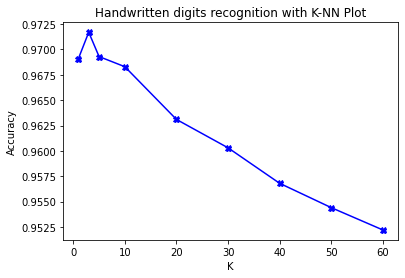

In [11]:
plt.plot(k_values, accuracy, 'X-', color='blue')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Handwritten digits recognition with K-NN Plot')
plt.savefig("HW3_Q1.png")
plt.show()